In [1]:
# mount google drive for dataset
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [2]:
# copy dataset zip file from drive to current colab session
!cp '/content/MyDrive/MyDrive/datasets/kidney dataset.zip' '/content/'

In [3]:
# unzip the dataset 
!unzip 'kidney dataset.zip'

Archive:  kidney dataset.zip
replace CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import floor
%matplotlib inline

In [5]:
df = pd.read_csv('kidneyData.csv')

In [6]:
df.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


In [7]:
df.shape

(12446, 6)

In [8]:
# There are total 12446 images for classification from 4 classes.

In [9]:
# Class 0 : Cyst
# Class 1 : Normal
# Class 2 : Kidney Stone
# Class 3 : Tumor

In [10]:
labels = ['Normal', 'Cyst', 'Kidney Stone', 'Tumor']

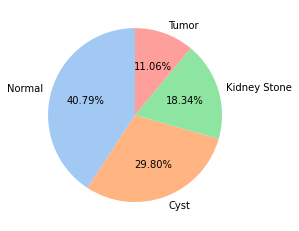

In [11]:
# check whether dataset is balanced or not
colors = sns.color_palette('pastel')[0:4]
plt.pie(df['target'].value_counts(), labels = labels, colors = colors,
        startangle = 90, autopct='%.2f%%')
plt.show()

In [12]:
# We have
# Around 41% of images of Normal Kidney / Healthy Kidney
# Around 30% of images of Kidney having Cyst 
# Around 18% of images of Kidney having Kidney Stone 
# Around 11% of images of Tumor afffected Kidney's

In [13]:
import tensorflow as tf
%tensorflow_version 2.x

In [14]:
# check for tensorflow version
tf.__version__

'2.7.0'

In [61]:
BATCH_SIZE = 32
IMG_WIDTH = 512
IMG_HEIGHT = 512
CHANNELS = 3
EPOCHS = 5

In [16]:
dataset = tf.keras.utils.image_dataset_from_directory('/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone',
                                                      batch_size=BATCH_SIZE,
                                                      image_size=(512, 512))

Found 12446 files belonging to 4 classes.


In [17]:
# total count of batches in dataset
len(dataset)

389

In [18]:
# 0.8 * 389 = 311
train_ds = dataset.take(floor(0.8 * len(dataset)))

In [19]:
remaining_ds = dataset.skip(floor(0.8 * len(dataset)))

In [20]:
# 50% of remaining_ds for validation and rest for testing purpose

In [21]:
# 0.5 * 78 = 39 batches for validation purpose
validation_ds = remaining_ds.take(floor(0.5 * len(remaining_ds)))

In [22]:
len(validation_ds)

39

In [23]:
# 0.5 * 78 = 39 batches for testing purpose
testing_ds = remaining_ds.skip(floor(0.5 * len(remaining_ds)))

In [24]:
# uncomment if have huge computational power
# prefetching code for faster processing
# train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
# validation_ds = validation_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
# testing_ds = testing_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
regularizer = 'l2'

In [62]:
model = tf.keras.models.Sequential()

In [63]:
model.add(tf.keras.layers.Resizing(IMG_HEIGHT, IMG_WIDTH))

In [64]:
model.add(tf.keras.layers.Rescaling(1/255.))

In [65]:
model.add(tf.keras.layers.Conv2D(16, (3,3), input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)))

In [66]:
model.add(tf.keras.layers.MaxPool2D())

In [67]:
model.add(tf.keras.layers.Conv2D(32, (3,3),
                                 kernel_regularizer = regularizer))

In [68]:
model.add(tf.keras.layers.MaxPool2D())

In [69]:
model.add(tf.keras.layers.Conv2D(64, (3,3),
                                 kernel_regularizer = regularizer))

In [70]:
model.add(tf.keras.layers.MaxPool2D())

In [71]:
model.add(tf.keras.layers.Conv2D(128, (3,3),
                                 kernel_regularizer = regularizer))

In [72]:
model.add(tf.keras.layers.MaxPool2D())

In [73]:
model.add(tf.keras.layers.Conv2D(128, (3,3),
                                 kernel_regularizer = regularizer))

In [74]:
model.add(tf.keras.layers.MaxPool2D())

In [75]:
model.add(tf.keras.layers.Conv2D(128, (3,3),
                                 kernel_regularizer = regularizer))

In [76]:
model.add(tf.keras.layers.MaxPool2D())

In [77]:
model.add(tf.keras.layers.Conv2D(128, (3,3),
                                 kernel_regularizer = regularizer))

In [78]:
model.add(tf.keras.layers.Flatten())

In [79]:
model.add(tf.keras.layers.Dense(512, activation='relu'))

In [80]:
model.add(tf.keras.layers.Dense(256, activation='relu'))

In [81]:
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [82]:
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [83]:
# build the model before summary
model.build(input_shape=(BATCH_SIZE, IMG_HEIGHT, IMG_WIDTH, CHANNELS))

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (1, 512, 512, 3)          0         
                                                                 
 rescaling_1 (Rescaling)     (1, 512, 512, 3)          0         
                                                                 
 conv2d_7 (Conv2D)           (1, 510, 510, 16)         448       
                                                                 
 max_pooling2d_6 (MaxPooling  (1, 255, 255, 16)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (1, 253, 253, 32)         4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (1, 126, 126, 32)        0         
 2D)                                                  

In [89]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [86]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10)

In [87]:
checkpoints =  tf.keras.callbacks.ModelCheckpoint('/content/MyDrive/MyDrive/datasets/kidney_disease_model/',
                                                  save_weights_only=True)

In [90]:
history = model.fit(train_ds, epochs = EPOCHS, validation_data = validation_ds,
                    callbacks = [checkpoints], use_multiprocessing=True)

Epoch 1/5
311/311 [==============================] - 62s 195ms/step - loss: 2.6460 - accuracy: 0.4833 - val_loss: 1.3251 - val_accuracy: 0.4631
Epoch 2/5
311/311 [==============================] - 61s 195ms/step - loss: 0.9286 - accuracy: 0.7057 - val_loss: 0.6111 - val_accuracy: 0.8197
Epoch 3/5
311/311 [==============================] - 61s 194ms/step - loss: 0.4798 - accuracy: 0.8807 - val_loss: 0.5200 - val_accuracy: 0.8702
Epoch 4/5
311/311 [==============================] - 61s 195ms/step - loss: 0.4087 - accuracy: 0.9295 - val_loss: 0.2589 - val_accuracy: 0.9551
Epoch 5/5
311/311 [==============================] - 61s 195ms/step - loss: 0.2457 - accuracy: 0.9535 - val_loss: 0.1476 - val_accuracy: 0.9816


In [ ]:
model.save('model.h5')